In [1]:
from gensim.models import Word2Vec

import warnings
warnings.filterwarnings('ignore')

In [2]:
# define training data
#Genism word2vec requires that a format of ‘list of lists’ be provided for training where every document contained in a list.
#Every list contains lists of tokens of that document.

corpus = [['dog','bites','man'], ["man", "bites" ,"dog"],["dog","eats","meat"],["man", "eats","food"]]


# corpus = [ ['Welcome','to','Institute'],
#              ['Institute','offers','NLP', 'ML', 'DL', 'and' , 'other', 'courses'],
#              ['Institute','is','best'],
#              ['Become','Data','Scientist'],
#              ['Data','Engineer'],['Become','Data','Scientist']
# ]

In [3]:
#Training the model

model_cbow = Word2Vec(corpus, min_count = 1 , window = 5 , sg = 0) #using CBOW Architecture for trainnig
model_skipgram = Word2Vec(corpus, min_count = 1 , window = 5 , sg = 1) #using skipGram Architecture for training 

## Continuous Bag of Words (CBOW) 
In CBOW, the primary task is to build a language model that correctly predicts the center word given the context words in which the center word appears.

In [5]:
#Summarize the loaded model
print(model_cbow)

# words = list(model_cbow.wv.key_to_index) # for latest version
words = list(model_cbow.wv.vocab) # for 3.8.3

print(words)

#Acess vector for one word
print(model_cbow.wv['dog'])

Word2Vec(vocab=6, size=100, alpha=0.025)
['dog', 'bites', 'man', 'eats', 'meat', 'food']
[-1.8140409e-03 -1.1546359e-03  2.0322914e-03  3.6108634e-03
  4.1437033e-03  1.5523999e-03  2.0660039e-03  2.2283453e-03
  3.9095380e-03 -2.7714267e-03 -9.1337046e-04 -2.2733877e-03
 -4.7801342e-03 -3.7386764e-03  2.8709029e-03  3.1070537e-03
  1.8857633e-03  3.9376193e-03  1.5002830e-03  1.3047457e-03
  3.8127911e-03  4.5310152e-03  3.4683398e-03  2.4420738e-03
  2.2986128e-03  2.5955685e-03  1.0069581e-03  3.0558193e-03
  2.7589421e-03  2.5718526e-03  3.8469320e-03 -2.4398172e-03
  4.6796147e-03  3.0315136e-05  2.2213701e-03  2.4019706e-03
  2.4296385e-03 -1.0083942e-03 -3.2379993e-03  2.0617321e-03
  2.1031422e-04  3.7714436e-03 -5.8251602e-04  6.7748385e-04
 -3.0885398e-04 -2.2630543e-03  3.2968216e-03  4.2547677e-03
  4.0373872e-03 -2.7711359e-03  4.2369673e-03  3.7075207e-03
  3.6331946e-03  1.9568903e-03  3.5395531e-04  4.0076878e-03
  4.1077654e-03 -3.5696574e-03  4.0074284e-03 -1.5351803e

In [6]:
#Compute similarity 
print("Similarity between eats and bites:",model_cbow.wv.similarity('eats', 'bites'))
print("Similarity between eats and man:",model_cbow.wv.similarity('eats', 'man'))

Similarity between eats and bites: -0.044878237
Similarity between eats and man: -0.2203236


In [7]:
# model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
# [('queen', 0.50882536)]

model_cbow.wv.most_similar(positive = ['man', 'dog'], negative = ['bites'], topn = 1)

[('eats', -0.07127087563276291)]

In [8]:
# look up top 5 words similar to 'bites'
model_cbow.wv.most_similar('bites', topn = 5)

[('man', 0.1134822890162468),
 ('food', 0.05453203618526459),
 ('meat', 0.051341038197278976),
 ('dog', -0.007848349399864674),
 ('eats', -0.04487825185060501)]

From the above similarity scores we can conclude that eats is more similar to bites than man.

In [9]:
# # save model
# model_cbow.save('model_cbow.bin')

# # load model
# new_model_cbow = Word2Vec.load('model_cbow.bin')
# print(new_model_cbow)

## SkipGram
In skipgram, the task is to predict the context words from the center word.

In [10]:
#Summarize the loaded model
print(model_skipgram)

#Summarize vocabulary
# words = list(model_skipgram.wv.key_to_index) # for latest version
words = list(model_skipgram.wv.vocab) # for 3.8.3
print(words)

#Acess vector for one word
print(model_skipgram.wv['dog'])

Word2Vec(vocab=6, size=100, alpha=0.025)
['dog', 'bites', 'man', 'eats', 'meat', 'food']
[-1.8140409e-03 -1.1546359e-03  2.0322914e-03  3.6108634e-03
  4.1437033e-03  1.5523999e-03  2.0660039e-03  2.2283453e-03
  3.9095380e-03 -2.7714267e-03 -9.1337046e-04 -2.2733877e-03
 -4.7801342e-03 -3.7386764e-03  2.8709029e-03  3.1070537e-03
  1.8857633e-03  3.9376193e-03  1.5002830e-03  1.3047457e-03
  3.8127911e-03  4.5310152e-03  3.4683398e-03  2.4420738e-03
  2.2986128e-03  2.5955685e-03  1.0069581e-03  3.0558193e-03
  2.7589421e-03  2.5718526e-03  3.8469320e-03 -2.4398172e-03
  4.6796147e-03  3.0315136e-05  2.2213701e-03  2.4019706e-03
  2.4296385e-03 -1.0083942e-03 -3.2379993e-03  2.0617321e-03
  2.1031422e-04  3.7714436e-03 -5.8251602e-04  6.7748385e-04
 -3.0885398e-04 -2.2630543e-03  3.2968216e-03  4.2547677e-03
  4.0373872e-03 -2.7711359e-03  4.2369673e-03  3.7075207e-03
  3.6331946e-03  1.9568903e-03  3.5395531e-04  4.0076878e-03
  4.1077654e-03 -3.5696574e-03  4.0074284e-03 -1.5351803e

In [11]:
#Compute similarity 
print("Similarity between eats and bites:",model_skipgram.wv.similarity('eats', 'bites'))
print("Similarity between eats and man:",model_skipgram.wv.similarity('eats', 'man'))

Similarity between eats and bites: -0.044882134
Similarity between eats and man: -0.22032067


From the above similarity scores we can conclude that eats is more similar to bites than man.

In [12]:
#Most similarity
model_skipgram.wv.most_similar('meat')

[('food', 0.0570247583091259),
 ('bites', 0.05134103074669838),
 ('eats', -0.02154838666319847),
 ('man', -0.0333634577691555),
 ('dog', -0.17783543467521667)]

In [13]:
# # save model
# model_skipgram.save('model_skipgram.bin')

# # load model
# new_model_skipgram = Word2Vec.load('model_skipgram.bin')
# print(model_skipgram)

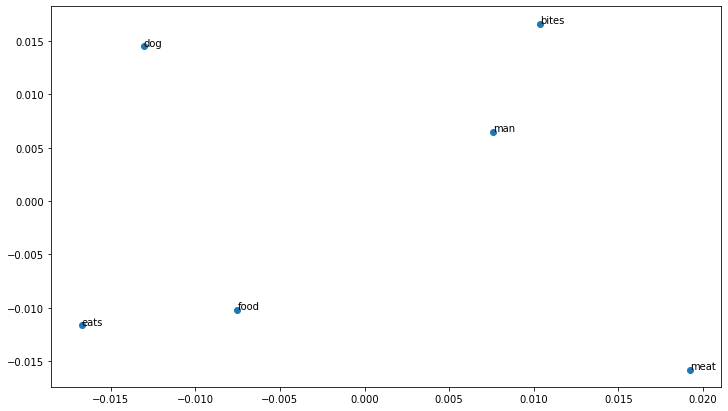

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)


X = model_skipgram.wv.vectors
result = pca.fit_transform(X)
# words = list(model_skipgram.wv.key_to_index) # for latest version
words = list(model_skipgram.wv.vocab) # for 3.8.3


fif = plt.figure(figsize = (12,7))
plt.scatter(result[:,0], result[:,1])

for i,w in enumerate(words):
    plt.annotate(w, xy = (result[i,0], result[i,1]) ,)
    
plt.show()

# Existing Model

In [17]:
import gensim.downloader

# Show all available models in gensim-data
for i in list(gensim.downloader.info()['models'].keys()):
    print(i)

fasttext-wiki-news-subwords-300
conceptnet-numberbatch-17-06-300
word2vec-ruscorpora-300
word2vec-google-news-300
glove-wiki-gigaword-50
glove-wiki-gigaword-100
glove-wiki-gigaword-200
glove-wiki-gigaword-300
glove-twitter-25
glove-twitter-50
glove-twitter-100
glove-twitter-200
__testing_word2vec-matrix-synopsis


In [ ]:
# # Download the "glove-twitter-25" embeddings
# glove_vectors = gensim.downloader.load('glove-twitter-25')

# # Use the downloaded vectors as usual:
# glove_vectors.most_similar('twitter')

In [ ]:
# google news model

# https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM